In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pivottablejs import pivot_ui
import numpy as np

#import train_test split
from sklearn.model_selection import GridSearchCV, train_test_split

#import regression models
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

#import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score

#import pipeline and transformers
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

#import preprocessors 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.metrics import explained_variance_score

from tabulate import tabulate
from functools import partial
rmse = partial(mean_squared_error, squared=False)

#import train_test split
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
import pickle
import gradio as gr

In [2]:
data = r"C:\Users\bolaj\Desktop\Desk\Data\Trip Prediction\Trip_Total_Amount_Prediction\New_York_City_Trips.csv"

In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
0,2009-09-16 20:45:23 UTC,-73.987603,40.728781,-73.998216,40.677855,1,6.10,0.0,16.9,17.40
1,2012-03-04 00:57:00 UTC,-74.004595,40.741882,-73.950250,40.787300,1,5.53,0.0,16.1,20.42
2,2014-04-11 00:16:56 UTC,-73.995064,40.721451,-74.038159,40.616236,2,11.10,0.0,31.5,41.50
3,2015-05-19 09:00:10 UTC,-73.945427,40.774059,-74.002724,40.742313,1,4.80,0.0,19.0,19.80
4,2010-05-22 12:30:55 UTC,-73.947361,40.775829,-73.993657,40.721529,2,5.70,0.0,17.7,18.20


In [5]:
df.isna().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
trip_distance        0
tolls_amount         0
fare_amount          0
total_amount         0
dtype: int64

In [6]:
df.shape

(10789, 10)

In [7]:
df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
count,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000
mean,-72.577466,39.988518,-72.577056,39.991694,1.648716,2.837068,0.228359,11.165192,13.280564
std,10.071200,5.523964,10.068592,5.510504,1.282589,3.319036,1.144977,9.444876,11.267704
min,-75.336579,0.000000,-75.381754,0.000000,0.000000,0.000000,0.000000,2.500000,2.500000
25%,-73.992172,40.735837,-73.991581,40.734267,1.000000,1.010000,0.000000,6.000000,7.200000
50%,-73.981871,40.753200,-73.980401,40.752872,1.000000,1.750000,0.000000,8.500000,10.000000
75%,-73.967330,40.767309,-73.964102,40.767484,2.000000,3.110000,0.000000,12.500000,14.600000
max,0.000000,41.366138,0.000000,41.366138,6.000000,42.800000,16.000000,194.750000,204.750000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10789 entries, 0 to 10788
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    10789 non-null  object 
 1   pickup_longitude   10789 non-null  float64
 2   pickup_latitude    10789 non-null  float64
 3   dropoff_longitude  10789 non-null  float64
 4   dropoff_latitude   10789 non-null  float64
 5   passenger_count    10789 non-null  int64  
 6   trip_distance      10789 non-null  float64
 7   tolls_amount       10789 non-null  float64
 8   fare_amount        10789 non-null  float64
 9   total_amount       10789 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 843.0+ KB


In [9]:
select_columns = df.columns[df.columns !='pickup_datetime'].to_list()

In [10]:
df[select_columns]

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
0,-73.987603,40.728781,-73.998216,40.677855,1,6.10,0.0,16.9,17.40
1,-74.004595,40.741882,-73.950250,40.787300,1,5.53,0.0,16.1,20.42
2,-73.995064,40.721451,-74.038159,40.616236,2,11.10,0.0,31.5,41.50
3,-73.945427,40.774059,-74.002724,40.742313,1,4.80,0.0,19.0,19.80
4,-73.947361,40.775829,-73.993657,40.721529,2,5.70,0.0,17.7,18.20
...,...,...,...,...,...,...,...,...,...
10784,-73.974570,40.733537,-74.015222,40.711447,1,4.47,0.0,12.9,15.40
10785,0.000000,0.000000,0.000000,0.000000,1,0.37,0.0,12.9,15.40
10786,-74.001157,40.722273,-73.983162,40.759319,1,3.00,0.0,12.9,13.40
10787,-74.009975,40.703357,-73.982000,40.746537,1,3.00,0.0,12.9,13.40


In [11]:
select_columns

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count',
 'trip_distance',
 'tolls_amount',
 'fare_amount',
 'total_amount']

In [12]:
# Calculate correlation matrix
corr_matrix = df[select_columns].corr()

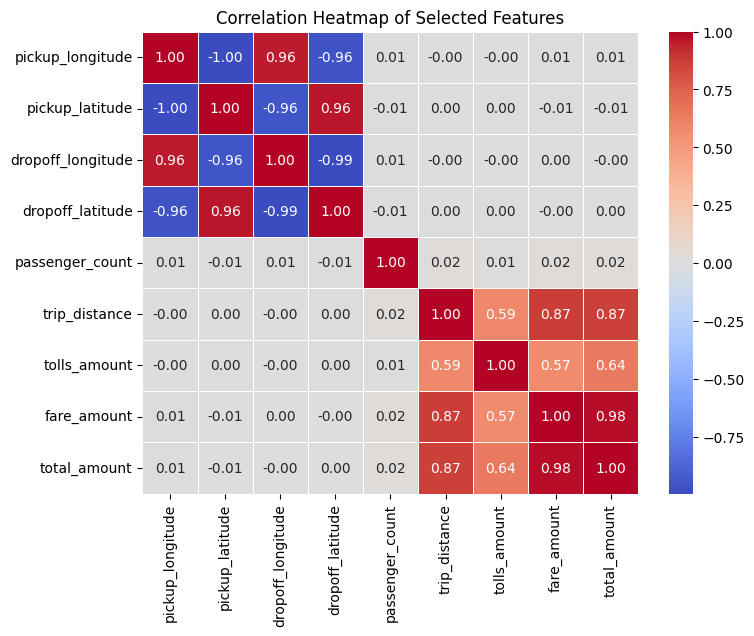

In [13]:
# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

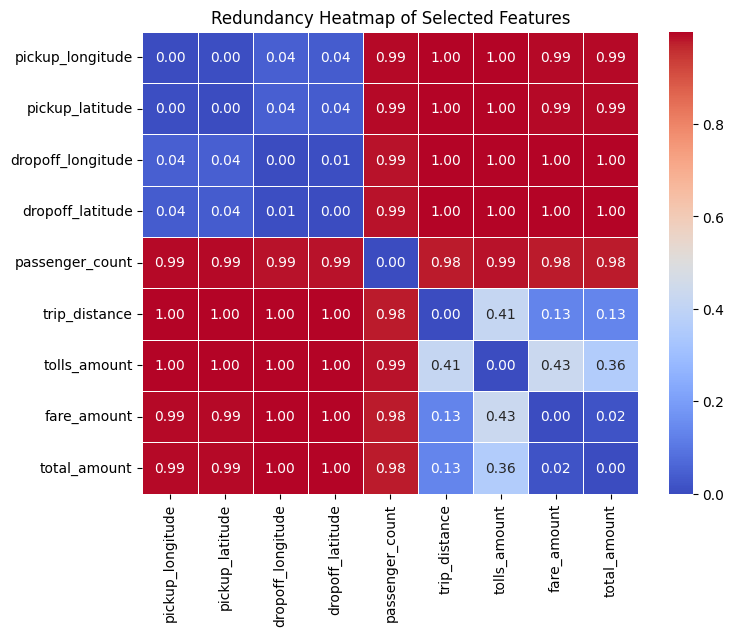

In [14]:
# Calculate redundancy matrix
redundancy_matrix = 1 - np.abs(corr_matrix)

# Plot redundancy heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(redundancy_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Redundancy Heatmap of Selected Features')
plt.show()

In [15]:
redundancy_matrix

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
pickup_longitude,0.000000,0.004544,0.044295,0.037671,0.993232,0.999809,0.997783,0.992720,0.994579
pickup_latitude,0.004544,0.000000,0.044474,0.037811,0.993629,0.999737,0.997110,0.992523,0.994485
dropoff_longitude,0.044295,0.044474,0.000000,0.006825,0.985987,0.997002,0.997200,0.999705,0.998487
dropoff_latitude,0.037671,0.037811,0.006825,0.000000,0.987956,0.996718,0.997336,0.999603,0.998783
passenger_count,0.993232,0.993629,0.985987,0.987956,0.000000,0.978837,0.985616,0.979286,0.977135
trip_distance,0.999809,0.999737,0.997002,0.996718,0.978837,0.000000,0.414135,0.131223,0.132808
tolls_amount,0.997783,0.997110,0.997200,0.997336,0.985616,0.414135,0.000000,0.430206,0.356515
fare_amount,0.992720,0.992523,0.999705,0.999603,0.979286,0.131223,0.430206,0.000000,0.017080
total_amount,0.994579,0.994485,0.998487,0.998783,0.977135,0.132808,0.356515,0.017080,0.000000


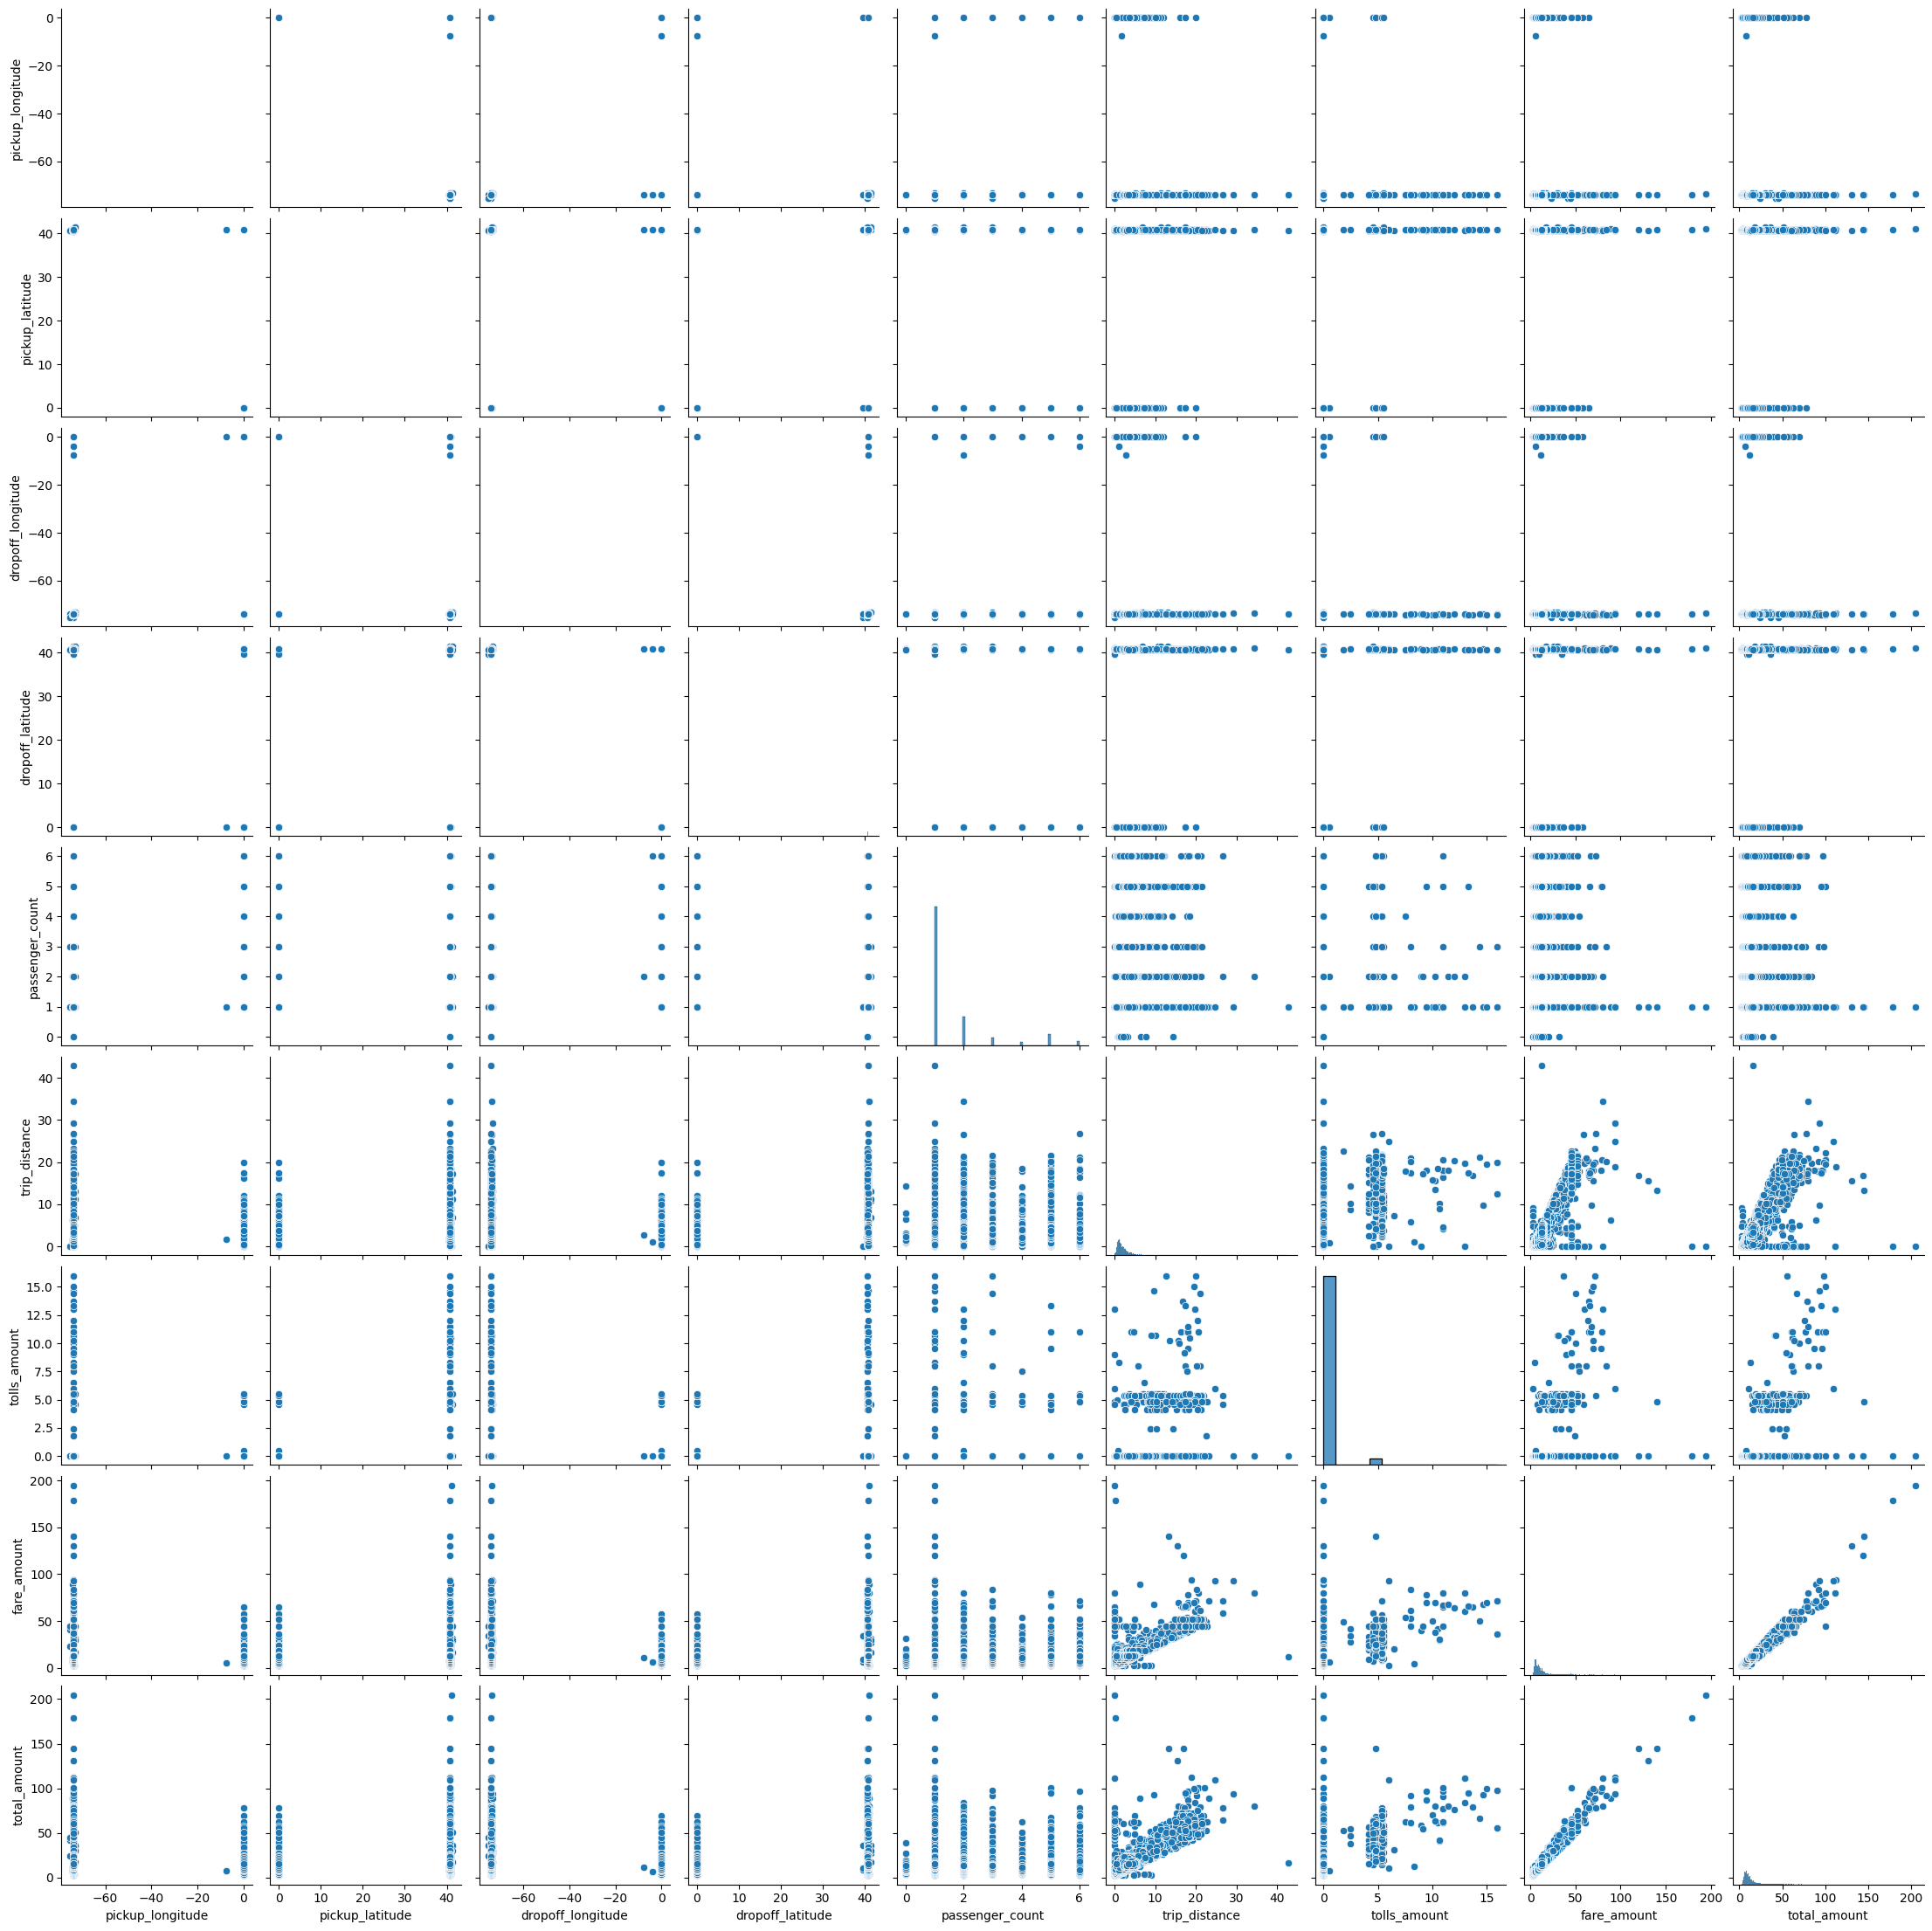

In [16]:
sns.pairplot(df[select_columns])

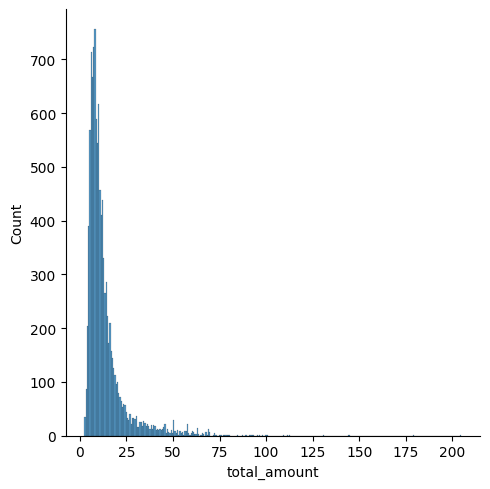

In [17]:
sns.displot(df['total_amount'],kind='hist')

<Axes: xlabel='passenger_count', ylabel='count'>

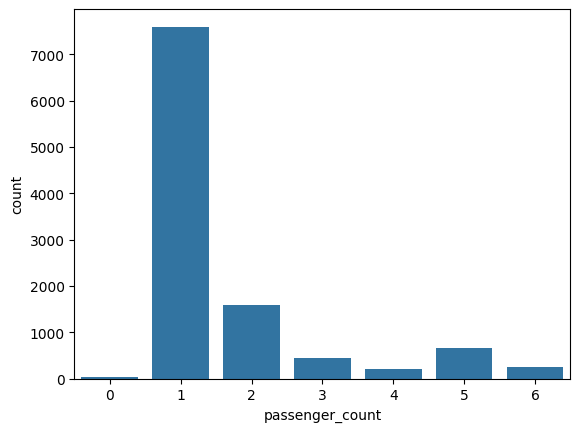

In [18]:
sns.countplot(x = 'passenger_count', data=df)

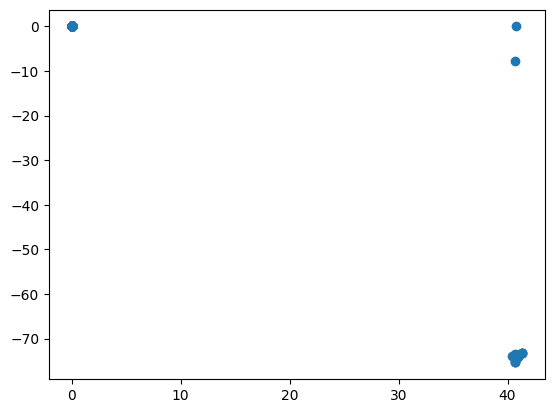

In [19]:
x = df['pickup_latitude']
y = df['pickup_longitude']

plt.scatter(x, y)
plt.show()

In [20]:
# Convert the 'Date' column to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [21]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
0,2009-09-16 20:45:23+00:00,-73.987603,40.728781,-73.998216,40.677855,1,6.10,0.0,16.9,17.40
1,2012-03-04 00:57:00+00:00,-74.004595,40.741882,-73.950250,40.787300,1,5.53,0.0,16.1,20.42
2,2014-04-11 00:16:56+00:00,-73.995064,40.721451,-74.038159,40.616236,2,11.10,0.0,31.5,41.50
3,2015-05-19 09:00:10+00:00,-73.945427,40.774059,-74.002724,40.742313,1,4.80,0.0,19.0,19.80
4,2010-05-22 12:30:55+00:00,-73.947361,40.775829,-73.993657,40.721529,2,5.70,0.0,17.7,18.20


In [22]:
# Extract year, month, day, and time as separate features
df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Day'] = df['pickup_datetime'].dt.day
df['Time'] = df['pickup_datetime'].dt.time

In [23]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount,Year,Month,Day,Time
0,2009-09-16 20:45:23+00:00,-73.987603,40.728781,-73.998216,40.677855,1,6.10,0.0,16.9,17.40,2009,9,16,20:45:23
1,2012-03-04 00:57:00+00:00,-74.004595,40.741882,-73.950250,40.787300,1,5.53,0.0,16.1,20.42,2012,3,4,00:57:00
2,2014-04-11 00:16:56+00:00,-73.995064,40.721451,-74.038159,40.616236,2,11.10,0.0,31.5,41.50,2014,4,11,00:16:56
3,2015-05-19 09:00:10+00:00,-73.945427,40.774059,-74.002724,40.742313,1,4.80,0.0,19.0,19.80,2015,5,19,09:00:10
4,2010-05-22 12:30:55+00:00,-73.947361,40.775829,-73.993657,40.721529,2,5.70,0.0,17.7,18.20,2010,5,22,12:30:55


In [24]:
df.drop('pickup_datetime',axis=1,inplace=True)

In [25]:
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount,Year,Month,Day,Time
0,-73.987603,40.728781,-73.998216,40.677855,1,6.10,0.0,16.9,17.40,2009,9,16,20:45:23
1,-74.004595,40.741882,-73.950250,40.787300,1,5.53,0.0,16.1,20.42,2012,3,4,00:57:00
2,-73.995064,40.721451,-74.038159,40.616236,2,11.10,0.0,31.5,41.50,2014,4,11,00:16:56
3,-73.945427,40.774059,-74.002724,40.742313,1,4.80,0.0,19.0,19.80,2015,5,19,09:00:10
4,-73.947361,40.775829,-73.993657,40.721529,2,5.70,0.0,17.7,18.20,2010,5,22,12:30:55


In [26]:
average_total_amount_by_year = df.groupby('Year')['total_amount'].mean()
average_total_amount_by_year

Year
2009    11.253491
2010    11.927098
2011    11.943885
2012    13.042425
2013    15.343770
2014    15.228329
2015    14.821718
Name: total_amount, dtype: float64

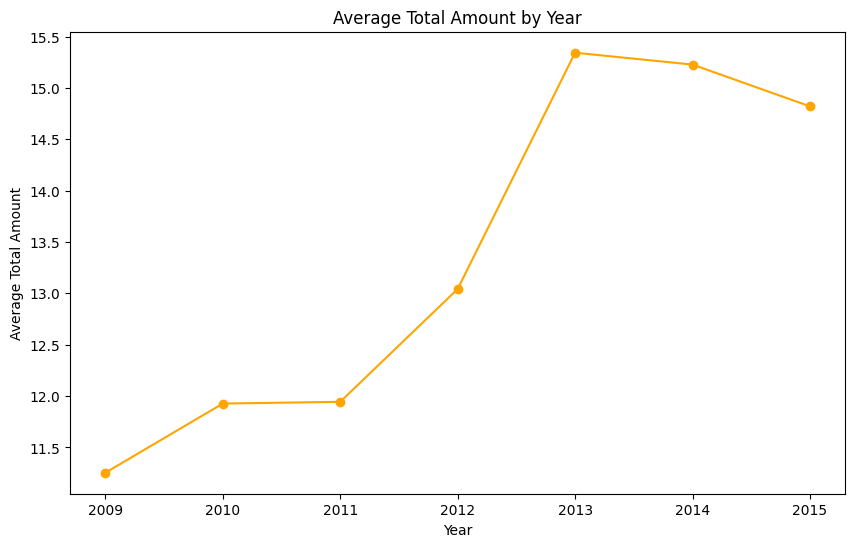

In [27]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_total_amount_by_year.index, average_total_amount_by_year.values, marker='o', linestyle='-', color='orange')
plt.title('Average Total Amount by Year')
plt.xlabel('Year')
plt.ylabel('Average Total Amount')
plt.xticks(average_total_amount_by_year.index)  # Ensure all years are displayed on x-axis
plt.show()

In [28]:
average_total_amount_by_month= df.groupby('Month')['total_amount'].mean()
average_total_amount_by_month

Month
1     13.378805
2     12.562989
3     13.215494
4     13.231237
5     13.557619
6     12.687542
7     12.765941
8     13.233899
9     12.315075
10    13.796302
11    13.551402
12    14.027874
Name: total_amount, dtype: float64

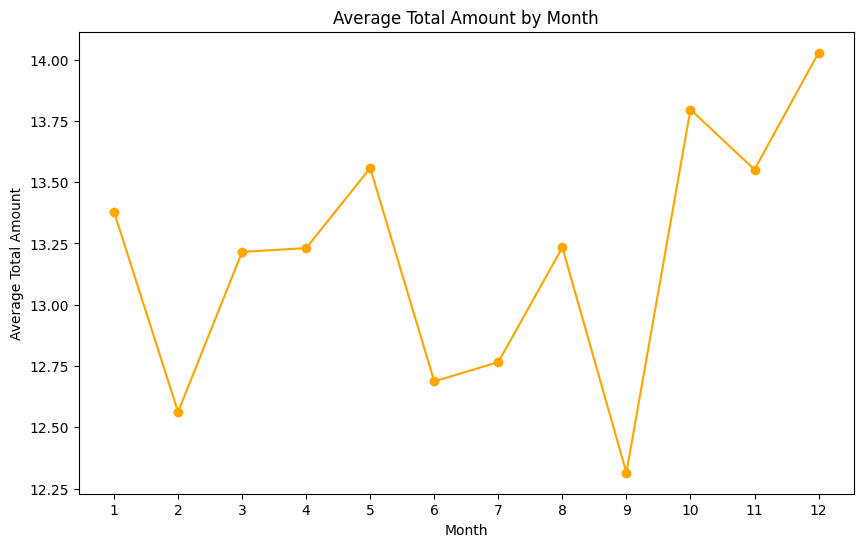

In [29]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_total_amount_by_month.index, average_total_amount_by_month.values, marker='o', linestyle='-', color='orange')
plt.title('Average Total Amount by Month')
plt.xlabel('Month')
plt.ylabel('Average Total Amount')
plt.xticks(average_total_amount_by_month.index)  # Ensure all years are displayed on x-axis
plt.show()

In [30]:
pivot_ui(df)

In [31]:
average= df.groupby('Month')[['total_amount','fare_amount']].mean()

In [32]:
average

,total_amount,fare_amount
Month,,
1,13.378805,11.274960
2,12.562989,10.231955
3,13.215494,11.127947
4,13.231237,11.181011
5,13.557619,11.430108
6,12.687542,10.545791
7,12.765941,10.944148
8,13.233899,11.203038
9,12.315075,10.668515


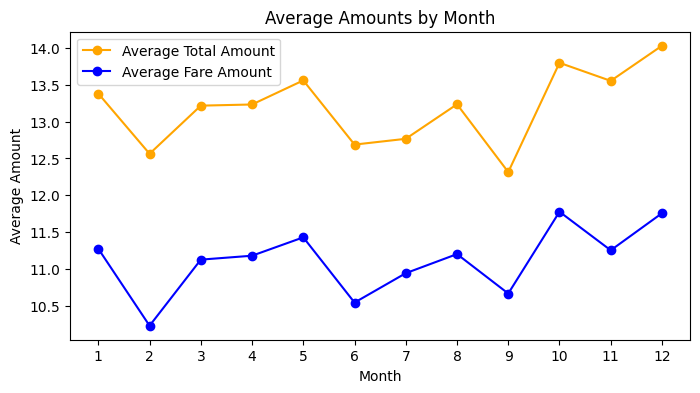

In [33]:
# Plotting
plt.figure(figsize=(8, 4))

# Plot average total_amount
plt.plot(average.index, average['total_amount'], marker='o', linestyle='-', color='orange', label='Average Total Amount')

# Plot average fare_amount
plt.plot(average.index, average['fare_amount'], marker='o', linestyle='-', color='blue', label='Average Fare Amount')

plt.title('Average Amounts by Month')
plt.xlabel('Month')
plt.ylabel('Average Amount')
plt.legend()  # Show legend
plt.xticks(range(1, 13))  # Ensure all months are displayed on x-axis
plt.show()

In [34]:
# Assuming 'Time' column is in the format 'HH:MM:SS'
df['Time'] = df['Time'].astype(str)  # Convert to string format
df['Time'] = pd.to_datetime(df['Time']).dt.hour

In [35]:
average_Time= df.groupby('Time')[['total_amount','fare_amount']].mean()

In [36]:
df.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'trip_distance', 'tolls_amount',
       'fare_amount', 'total_amount', 'Year', 'Month', 'Day', 'Time'],
      dtype='object')

In [37]:
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount,Year,Month,Day,Time
0,-73.987603,40.728781,-73.998216,40.677855,1,6.10,0.0,16.9,17.40,2009,9,16,20
1,-74.004595,40.741882,-73.950250,40.787300,1,5.53,0.0,16.1,20.42,2012,3,4,0
2,-73.995064,40.721451,-74.038159,40.616236,2,11.10,0.0,31.5,41.50,2014,4,11,0
3,-73.945427,40.774059,-74.002724,40.742313,1,4.80,0.0,19.0,19.80,2015,5,19,9
4,-73.947361,40.775829,-73.993657,40.721529,2,5.70,0.0,17.7,18.20,2010,5,22,12


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10789 entries, 0 to 10788
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_longitude   10789 non-null  float64
 1   pickup_latitude    10789 non-null  float64
 2   dropoff_longitude  10789 non-null  float64
 3   dropoff_latitude   10789 non-null  float64
 4   passenger_count    10789 non-null  int64  
 5   trip_distance      10789 non-null  float64
 6   tolls_amount       10789 non-null  float64
 7   fare_amount        10789 non-null  float64
 8   total_amount       10789 non-null  float64
 9   Year               10789 non-null  int64  
 10  Month              10789 non-null  int64  
 11  Day                10789 non-null  int64  
 12  Time               10789 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 1.1 MB


In [39]:
df.isna().sum()

pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
trip_distance        0
tolls_amount         0
fare_amount          0
total_amount         0
Year                 0
Month                0
Day                  0
Time                 0
dtype: int64

### Model Building

In [40]:
X ,y = df.drop(['total_amount','fare_amount','dropoff_longitude','tolls_amount','dropoff_latitude'],axis=1),df['total_amount']

In [41]:
# import sklearn
# print(sklearn.__version__)

In [42]:
# Set a random seed for reproducibility
random_seed = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.4, train_size=0.6, random_state=random_seed)

In [43]:
X_train.head()

,pickup_longitude,pickup_latitude,passenger_count,trip_distance,Year,Month,Day,Time
9259,-73.991109,40.750325,1,0.7,2010,7,9,13
6757,-73.960872,40.766381,1,4.5,2011,6,11,16
8786,-73.990736,40.761078,2,4.8,2011,10,2,5
4151,-73.990852,40.747010,1,1.4,2014,10,1,19
5144,-74.003882,40.725357,1,1.6,2013,7,12,10


In [44]:
X_train.shape

(6473, 8)

In [45]:
y_train.head()

9259     5.40
6757    19.00
8786    17.64
4151    10.00
5144    13.20
Name: total_amount, dtype: float64

In [46]:
#numerical features excluding booleans and object to list 
numeric_features = X_train.select_dtypes(exclude=['bool', 'object','category']).columns.tolist()

In [47]:
len(numeric_features)

8

In [48]:
#setting up a pipeline for scaling the numerical features
numeric_transformer = Pipeline(
    steps=[ 
        ("scaler", StandardScaler())
    ]
).set_output(transform='pandas')
numeric_transformer

Pipeline(steps=[('scaler', StandardScaler())])

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)
preprocessor.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['pickup_longitude', 'pickup_latitude',
                                  'passenger_count', 'trip_distance', 'Year',
                                  'Month', 'Day', 'Time'])],
                  verbose_feature_names_out=False)

In [50]:
X_train.columns

Index(['pickup_longitude', 'pickup_latitude', 'passenger_count',
       'trip_distance', 'Year', 'Month', 'Day', 'Time'],
      dtype='object')

In [51]:
X_train = preprocessor.fit_transform(X_train,y_train)

In [52]:
X_test=preprocessor.transform(X_test)

In [53]:
X_train.head()

,pickup_longitude,pickup_latitude,passenger_count,trip_distance,Year,Month,Day,Time
9259,-0.138393,0.136067,-0.506181,-0.640368,-0.959164,0.120312,-0.727006,-0.027346
6757,-0.135351,0.139012,-0.506181,0.528647,-0.429595,-0.151134,-0.497136,0.432018
8786,-0.138356,0.138039,0.270611,0.620938,-0.429595,0.934650,-1.531554,-1.252316
4151,-0.138368,0.135458,-0.506181,-0.425023,1.159112,0.934650,-1.646489,0.891382
5144,-0.139679,0.131487,-0.506181,-0.363496,0.629543,0.120312,-0.382200,-0.486710


In [54]:
# X_train[['numerical__LoanAmount','LoanAmount']]
X_train.columns

Index(['pickup_longitude', 'pickup_latitude', 'passenger_count',
       'trip_distance', 'Year', 'Month', 'Day', 'Time'],
      dtype='object')

### Decision Tree

In [55]:
DTpipeline = Pipeline(
    steps=[
        ("DT", DecisionTreeRegressor()
        )
    ]
).set_output(transform='pandas')
DTpipeline

Pipeline(steps=[('DT', DecisionTreeRegressor())])

In [56]:
DTpipeline.fit(X_train, y_train)

Pipeline(steps=[('DT', DecisionTreeRegressor())])

In [57]:
DTpipeline.score(X_train, y_train), DTpipeline.score(X_test,y_test)

(1.0, 0.6771075005438725)

In [58]:
# Predict the target values for the test data
y_pred_dt = DTpipeline.predict(X_test)
y_pred_dt

array([ 7.92, 12.6 , 12.5 , ..., 11.5 , 15.8 , 16.6 ])

In [59]:
# Evaluating the model
dtmse = mean_squared_error(y_test, y_pred_dt)
dtmae = mean_absolute_error(y_test, y_pred_dt)
dtrmse = mean_squared_error(y_test, y_pred_dt, squared=False)
dtr2 = r2_score(y_test, y_pred_dt)

# Store evaluation metrics in a dictionary
DT_evaluation = {
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared Error', 'R-squared Score'],
    'Value': [dtmse, dtmae, dtrmse, dtr2]
}

C:\Users\bolaj\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [60]:
# Display evaluation metrics in a table
print(tabulate(DT_evaluation, headers='keys', tablefmt='fancy_grid'))

╒═════════════════════════╤═══════════╕
│ Metric                  │     Value │
╞═════════════════════════╪═══════════╡
│ Mean Squared Error      │ 41.2865   │
├─────────────────────────┼───────────┤
│ Mean Absolute Error     │  2.91778  │
├─────────────────────────┼───────────┤
│ Root Mean Squared Error │  6.42546  │
├─────────────────────────┼───────────┤
│ R-squared Score         │  0.677108 │
╘═════════════════════════╧═══════════╛


In [61]:
# Accessing the Decision Tree model from the pipeline
DT_model = DTpipeline.named_steps['DT']

# Accessing the feature importances from the Decision Tree model
DT_feature_importances = DT_model.feature_importances_

In [62]:
# Printing feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, DT_feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
pickup_longitude: 0.042903044807642565
pickup_latitude: 0.0648036124588721
passenger_count: 0.004664870382704772
trip_distance: 0.8085382900899015
Year: 0.03748240539561381
Month: 0.0075605698245193725
Day: 0.01402838395420627
Time: 0.020018823086539662


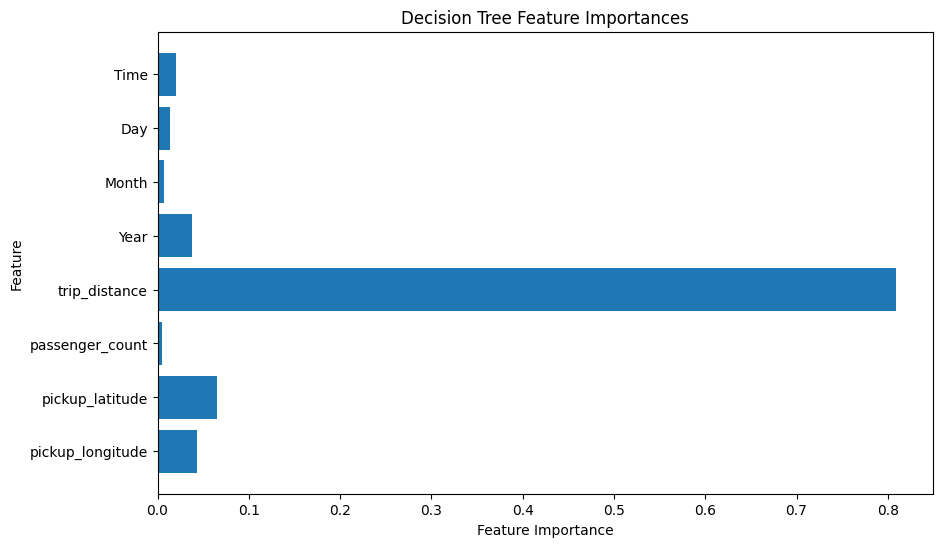

In [63]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, DT_feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importances')
plt.show()

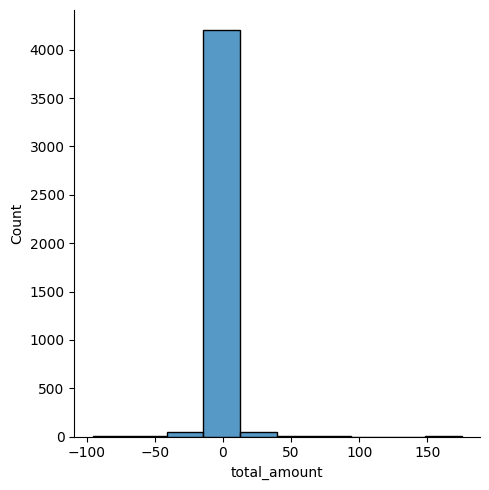

In [64]:
sns.displot((y_test-y_pred_dt),bins=10)

### linear Regression to understand the coefficient

In [65]:
lm = LinearRegression()

In [66]:
lm.fit(X_train, y_train)

LinearRegression()

In [67]:
print(lm.intercept_)

13.158231113857534


In [68]:
coeff_df = pd.DataFrame(lm.coef_,X.columns, columns=['coefficient'])
coeff_df

,coefficient
pickup_longitude,-0.176012
pickup_latitude,-0.318842
passenger_count,-0.025739
trip_distance,9.729511
Year,1.529059
Month,0.354202
Day,0.310046
Time,0.385478


### Random Forest

In [69]:
RDpipeline = Pipeline(
    steps=[
        ("DT", RandomForestRegressor()
        )
    ]
).set_output(transform='pandas')
RDpipeline

Pipeline(steps=[('DT', RandomForestRegressor())])

In [70]:
RDpipeline.fit(X_train, y_train)

Pipeline(steps=[('DT', RandomForestRegressor())])

In [71]:
RDpipeline.score(X_train, y_train), RDpipeline.score(X_test,y_test)

(0.9745809728735364, 0.7950239433313344)

In [72]:
# Predict the target values for the test data
y_pred_RD = RDpipeline.predict(X_test)
y_pred_RD

array([ 8.1917,  8.4047, 11.6239, ..., 11.5327, 20.0502, 16.3526])

In [73]:
# Evaluating the model
rdmse = mean_squared_error(y_test, y_pred_RD)
rdmae = mean_absolute_error(y_test, y_pred_RD)
rdrmse = mean_squared_error(y_test, y_pred_RD, squared=False)
rdr2 = r2_score(y_test, y_pred_RD)

# Store evaluation metrics in a dictionary
RD_evaluation = {
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared Error', 'R-squared Score'],
    'Value': [rdmse, rdmae, rdrmse, rdr2]
}

C:\Users\bolaj\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [74]:
# Display evaluation metrics in a table
print(tabulate(RD_evaluation, headers='keys', tablefmt='fancy_grid'))

╒═════════════════════════╤═══════════╕
│ Metric                  │     Value │
╞═════════════════════════╪═══════════╡
│ Mean Squared Error      │ 26.2092   │
├─────────────────────────┼───────────┤
│ Mean Absolute Error     │  2.20952  │
├─────────────────────────┼───────────┤
│ Root Mean Squared Error │  5.11949  │
├─────────────────────────┼───────────┤
│ R-squared Score         │  0.795024 │
╘═════════════════════════╧═══════════╛


In [75]:
# Accessing the Decision Tree model from the pipeline
RD_model = RDpipeline.named_steps['DT']

# Accessing the feature importances from the Decision Tree model
RD_feature_importances = RD_model.feature_importances_

In [76]:
# Printing feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, RD_feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
pickup_longitude: 0.03960617827509721
pickup_latitude: 0.07643083872184572
passenger_count: 0.00486067915199527
trip_distance: 0.8007563778908077
Year: 0.03499534082837037
Month: 0.011272958559758042
Day: 0.016161727346866103
Time: 0.015915899225259576


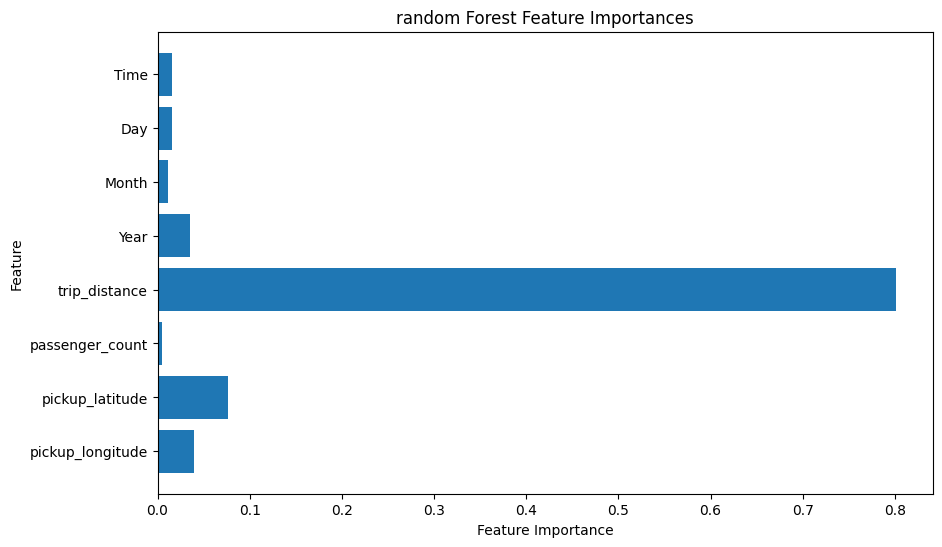

In [77]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, RD_feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('random Forest Feature Importances')
plt.show()

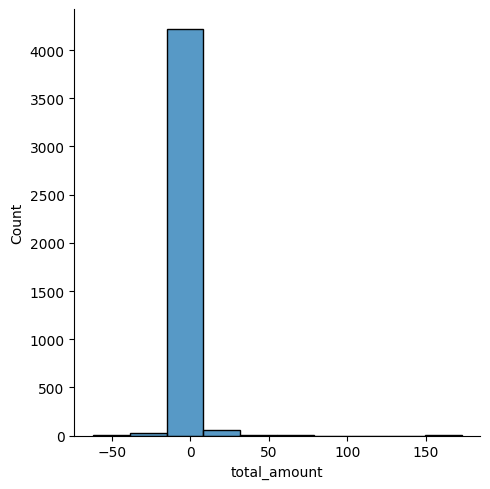

In [78]:
sns.displot((y_test-y_pred_RD),bins=10)

### Xgboost

In [79]:
XGpipeline = Pipeline(
    steps=[
        ("XG", XGBRegressor()
        )
    ]
).set_output(transform='pandas')
XGpipeline

Pipeline(steps=[('XG',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [80]:
XGpipeline.fit(X_train, y_train)

Pipeline(steps=[('XG',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [81]:
XGpipeline.score(X_train, y_train), XGpipeline.score(X_test,y_test)

(0.9873504876670497, 0.7719565348964479)

In [82]:
# Predict the target values for the test data
y_pred_xg = XGpipeline.predict(X_test)
y_pred_xg

array([ 7.2083592,  7.926657 , 11.437289 , ..., 12.040076 , 20.615679 ,
       15.894403 ], dtype=float32)

In [83]:
# Evaluating the model
xgmse = mean_squared_error(y_test, y_pred_xg)
xgmae = mean_absolute_error(y_test, y_pred_xg)
xgrmse = mean_squared_error(y_test, y_pred_xg, squared=False)
xgr2 = r2_score(y_test, y_pred_xg)

# Store evaluation metrics in a dictionary
XG_evaluation = {
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared Error', 'R-squared Score'],
    'Value': [xgmse, xgmae, xgrmse, xgr2]
}

C:\Users\bolaj\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [84]:
# Display evaluation metrics in a table
print(tabulate(XG_evaluation, headers='keys', tablefmt='fancy_grid'))

╒═════════════════════════╤═══════════╕
│ Metric                  │     Value │
╞═════════════════════════╪═══════════╡
│ Mean Squared Error      │ 29.1587   │
├─────────────────────────┼───────────┤
│ Mean Absolute Error     │  2.28408  │
├─────────────────────────┼───────────┤
│ Root Mean Squared Error │  5.39988  │
├─────────────────────────┼───────────┤
│ R-squared Score         │  0.771957 │
╘═════════════════════════╧═══════════╛


In [85]:
# Accessing the Decision Tree model from the pipeline
XG_model = XGpipeline.named_steps['XG']

# Accessing the feature importances from the Decision Tree model
XG_feature_importances = XG_model.feature_importances_

In [86]:
# Printing feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, XG_feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
pickup_longitude: 0.04458405822515488
pickup_latitude: 0.0337393619120121
passenger_count: 0.013132615014910698
trip_distance: 0.7083473801612854
Year: 0.1190551146864891
Month: 0.019763203337788582
Day: 0.031857289373874664
Time: 0.02952095866203308


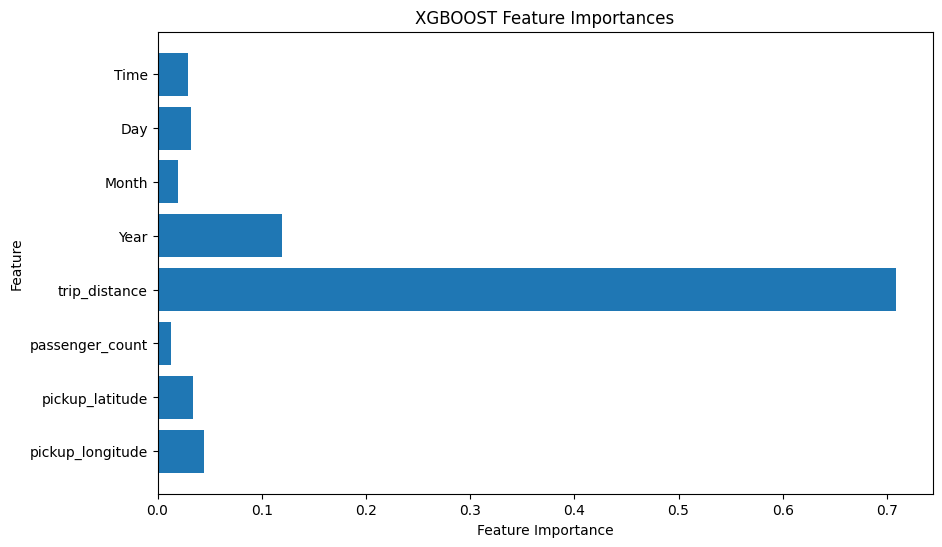

In [87]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, XG_feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBOOST Feature Importances')
plt.show()

### Grid Search

In [88]:
# Define the parameter grid for RandomForest
rf_param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt']
}

In [89]:
# Initialize the GridSearchCV for RandomForest
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5, scoring='neg_mean_squared_error')

In [90]:
# Fit the GridSearchCV for RandomForest
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150]},
             scoring='neg_mean_squared_error')

In [91]:
# Get the best RandomForest model and parameters
best_rf_model = rf_grid_search.best_estimator_
best_rf_params = rf_grid_search.best_params_
best_rf_score = rf_grid_search.best_score_

In [92]:
print("RandomForest Best Model:")
print(best_rf_model)
print("RandomForest Best Parameters:")
print(best_rf_params)
print("RandomForest Best Score (Negative Mean Squared Error):")
print(best_rf_score)

RandomForest Best Model:
RandomForestRegressor(max_depth=20, max_features='log2', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=150, random_state=42)
RandomForest Best Parameters:
{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
RandomForest Best Score (Negative Mean Squared Error):
-24.973344309175815


In [93]:
best_rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, max_features='log2', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=150, random_state=42)

In [94]:
grd_pred = best_rf_model.predict(X_test)

In [95]:
grd_pred

array([ 7.96861536,  8.35723258, 11.91748927, ..., 11.68770436,
       19.5184304 , 15.70039852])

In [96]:
# Evaluating the model
grdmse = mean_squared_error(y_test, grd_pred)
grdmae = mean_absolute_error(y_test, grd_pred)
grdrmse = mean_squared_error(y_test, grd_pred, squared=False)
grdr2 = r2_score(y_test, grd_pred)

# Store evaluation metrics in a dictionary
Grd_evaluation = {
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared Error', 'R-squared Score'],
    'Value': [grdmse, grdmae, grdrmse, grdr2]
}

C:\Users\bolaj\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [97]:
# Display evaluation metrics in a table
print(tabulate(Grd_evaluation, headers='keys', tablefmt='fancy_grid'))
print("The MAE of {:.5f} means that, on average, the model's prediction is off by approximately ${:.2f}".format(grdmae, grdmae))
print("The RMSE of {:.5f}  indicates that, on average, the model's predictions are off by approximately ${:.2f}".format(grdrmse, grdrmse))


╒═════════════════════════╤═══════════╕
│ Metric                  │     Value │
╞═════════════════════════╪═══════════╡
│ Mean Squared Error      │ 24.0179   │
├─────────────────────────┼───────────┤
│ Mean Absolute Error     │  2.14788  │
├─────────────────────────┼───────────┤
│ Root Mean Squared Error │  4.90081  │
├─────────────────────────┼───────────┤
│ R-squared Score         │  0.812162 │
╘═════════════════════════╧═══════════╛
The MAE of 2.14788 means that, on average, the model's prediction is off by approximately $2.15
The RMSE of 4.90081  indicates that, on average, the model's predictions are off by approximately $4.90


### Deployment

In [98]:
# !pip install flask scikit-learn

In [99]:
df.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'trip_distance', 'tolls_amount',
       'fare_amount', 'total_amount', 'Year', 'Month', 'Day', 'Time'],
      dtype='object')

In [100]:
# Specify the columns to drop and column to dropna
columns_to_drop = ['fare_amount','dropoff_longitude']
# column_to_dropna = 'Credit_History'
# columns_to_drop2= ['numerical__LoanAmount','numerical__Loan_Amount_Term']

In [101]:
# Custom transformer to drop specified columns
class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Filter out columns that exist in the DataFrame
        existing_columns = [col for col in self.columns if col in X.columns]
        return X.drop(existing_columns, axis=1)

In [102]:
# Custom transformer to drop NA values specifically in the "Credit_History" column
class DropNAForColumn(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[~X[self.column].isnull()]

In [103]:
# Create a Pipeline for dropping columns or rows with missing values
dropper = Pipeline(steps=[
    ('drop_columns', ColumnDropper(columns_to_drop)),  
    # ('dropna_credit_history', DropNAForColumn(column='Credit_History'))
])


In [104]:
# Creating the Logistic Regression model with increased max_iter
Saved_model = Pipeline(steps=[
    ('dropper', dropper),
    ('preprocessor', preprocessor),
    ('classifier', best_rf_model)
])
Saved_model

Pipeline(steps=[('dropper',
                 Pipeline(steps=[('drop_columns',
                                  ColumnDropper(columns=['fare_amount',
                                                         'dropoff_longitude']))])),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['pickup_longitude',
                                                   'pickup_latitude',
                                                   'passenger_count',
                                                   'trip_distance', 'Year',
                                                   'Month', 'Day', 'Time'])],
                                   verbose_feature_names_out=False)),
                ('classifier',
                 RandomForestRegressor(max_depth=20, max_features='log2',
                                       min_samples_leaf=2, min_samples_split=10,
                                       n_estimators=150, random_state=42))])

In [105]:
df.columns.to_list()

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count',
 'trip_distance',
 'tolls_amount',
 'fare_amount',
 'total_amount',
 'Year',
 'Month',
 'Day',
 'Time']

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10789 entries, 0 to 10788
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_longitude   10789 non-null  float64
 1   pickup_latitude    10789 non-null  float64
 2   dropoff_longitude  10789 non-null  float64
 3   dropoff_latitude   10789 non-null  float64
 4   passenger_count    10789 non-null  int64  
 5   trip_distance      10789 non-null  float64
 6   tolls_amount       10789 non-null  float64
 7   fare_amount        10789 non-null  float64
 8   total_amount       10789 non-null  float64
 9   Year               10789 non-null  int64  
 10  Month              10789 non-null  int64  
 11  Day                10789 non-null  int64  
 12  Time               10789 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 1.1 MB


In [107]:
test_row = df.sample(1)

In [108]:
test_row

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount,Year,Month,Day,Time
15,-74.0039,40.717222,-73.955505,40.777727,2,7.62,0.0,22.5,28.1,2013,1,29,5


In [109]:
sample_test = pd.DataFrame(test_row)

In [110]:
# Predict the output
B_pred = Saved_model.predict(sample_test)

print("Predicted Output:", B_pred)

Predicted Output: [26.13568068]


In [111]:
# Save the model
with open('Saved_Trip_price.pkl', 'wb') as file:
    pickle.dump(Saved_model, file)

In [112]:
def predict_trip_amount(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, trip_distance, Year, Month, Day, Time):
    # Create a DataFrame with the input features
    data = pd.DataFrame({
        'pickup_longitude': [float(pickup_longitude)],
        'pickup_latitude': [float(pickup_latitude)],
        'dropoff_longitude': [float(dropoff_longitude)],
        'dropoff_latitude': [float(dropoff_latitude)],
        'passenger_count': [int(passenger_count)],
        'trip_distance': [float(trip_distance)],
        # 'tolls_amount': [float(tolls_amount)],
        # 'fare_amount': [float(fare_amount)],
        'Year': [int(Year)],
        'Month': [int(Month)],
        'Day': [int(Day)],
        'Time': [Time]
    })

    model = pickle.load(open(r"C:\Users\bolaj\Desktop\Desk\Data\Trip Prediction\Trip_Total_Amount_Prediction\Saved_Trip_price.pkl","rb"))
    
    # Make prediction using the loaded model
    prediction = model.predict(data)[0]
    return f"Predicted total amount of the trip: £{prediction:.2f}"

my_theme = gr.Theme.from_hub('earneleh/paris@0.0.1')

def create_taxi_fare_prediction_interface():   
    # with gr.Blocks(gr.themes.Monochrome()) as demo:
    with gr.Blocks(theme=my_theme) as demo:
        with gr.Column():
            pickup_longitude = gr.Textbox(label="Pickup Longitude", placeholder="Enter pickup longitude...")
            pickup_latitude = gr.Textbox(label="Pickup Latitude", placeholder="Enter pickup latitude...")
            dropoff_longitude = gr.Textbox(label="Dropoff Longitude", placeholder="Enter dropoff longitude...")
            dropoff_latitude = gr.Textbox(label="Dropoff Latitude", placeholder="Enter dropoff latitude...")
            passenger_count = gr.Slider(label="Passenger Count", minimum=1, maximum=6, step=1)
            trip_distance = gr.Textbox(label="Trip Distance", placeholder="Enter trip distance in miles...")
            # tolls_amount = gr.Textbox(label="Tolls Amount", placeholder="Enter tolls amount...")
            # fare_amount = gr.Textbox(label="Fare Amount", placeholder="Enter fare amount...")
            Year = gr.Textbox(label="Year", placeholder="Enter year...")
            Month = gr.Textbox(label="Month", placeholder="Enter month (as in May as 5)...")
            Day = gr.Textbox(label="Day", placeholder="Enter day...")
            Time = gr.Textbox(label="Time", placeholder="Enter time in hour(as in 3pm as 15)...")

            generate_btn = gr.Button("Predict Fare")
            gr.Markdown("Predicted Fare:")
            output = gr.Text(label="Predicted Fare")

        generate_btn.click(fn=predict_trip_amount, inputs=[pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, trip_distance, Year, Month, Day, Time], outputs=output)
        
        return demo

if __name__ == "__main__":
    create_taxi_fare_prediction_interface().launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
